# Watershed
Initial Test of the watershed algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

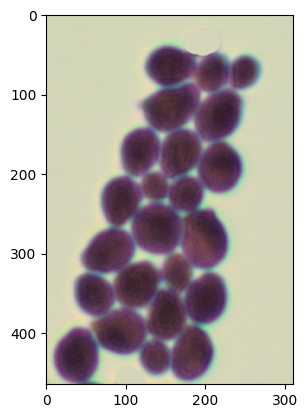

In [2]:
image_name = "../dataset/png/Candida.albicans_0004.png"
image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Trivial binarization

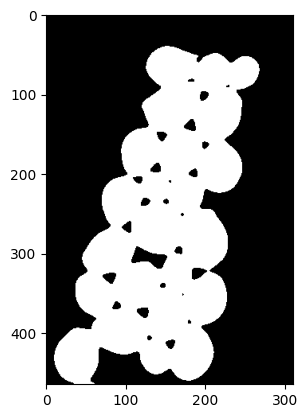

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_image = cv2.GaussianBlur(gray_image, (5,5), 0)
_, binarized_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binarized_image, cmap='gray', vmin=0, vmax=255)

# Dist transform

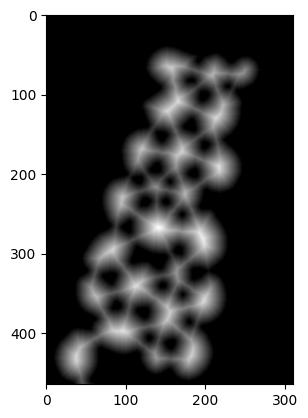

In [4]:
dist_transform = cv2.distanceTransform(binarized_image, cv2.DIST_L2, 3, dstType=cv2.CV_8U)
cv2.normalize(dist_transform, dist_transform, 0, 255, cv2.NORM_MINMAX)
plt.imshow(dist_transform, cmap='gray', vmin=0, vmax=255)

Binarize distance

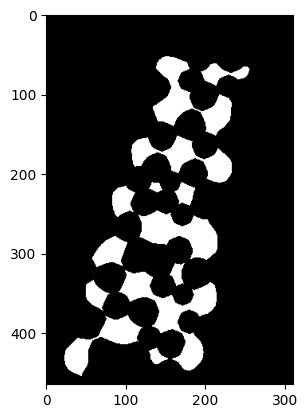

In [5]:
_, dist = cv2.threshold(dist_transform, 100, 255, cv2.THRESH_BINARY)

plt.imshow(dist, cmap='gray', vmin=0, vmax=255)

Create markers mask

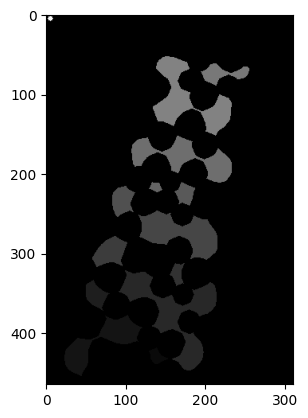

In [6]:
# Create the CV_8U version of the distance image
# It is needed for findContours()
dist_8u = dist.astype('uint8')
# Find total markers
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)
# Draw the foreground markers
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)
# Draw the background marker
cv2.circle(markers, (5,5), 3, (255,255,255), -1)
markers_8u = (markers * 10).astype('uint8')
plt.imshow(markers_8u, cmap='gray', vmin=0, vmax=255)

# Apply watershed

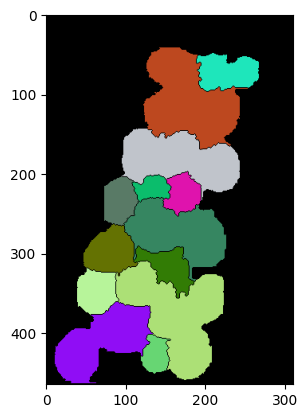

In [7]:
from random import randint

# Perform the watershed algorithm
watershed_result = cv2.watershed(image, markers)
#mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv2.bitwise_not(mark)
# uncomment this if you want to see how the mark
# image looks like at that point
#cv2.imshow('Markers_v2', mark)
# Generate random colors
colors = []
for contour in contours:
    colors.append((randint(0,256), randint(0,256), randint(0,256)))
# Create the result image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)
# Fill labeled objects with random colors
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]

# Visualize the final image
plt.imshow(dst)

# Draw contours

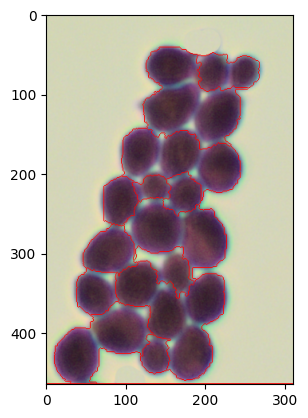

In [8]:
result_image = image.copy()
result_image[watershed_result == -1] = [255,0,0]
plt.imshow(result_image)